# NoteBook 1

Ce notebook est découpé en plusieurs axes de travail :

- Téléchargement des données grâce au JSON
- Première exploration du DataSet
- Identification de la problématique
- Téléchargement des images
- Sorties de ce notebook

En sortie de ce notebook, nous avons un dataframe exporté en .csv et un dataframe obtenable avec le lancement d'une fonction.
Ces deux sorties, nous serons utiles pour la réalisation de notre projet de reconnaissance automatique de champignons sur notre problématique retenues. 

# Init Kernel

In [92]:
#!python3 -m venv myenvCHAMPI

In [93]:
#!python -m ipykernel install --user --name=myenvCHAMPI

In [94]:
#Windows
# myenvCHAMPI\Scripts\activate.bat
#Mac
#!source myenvCHAMPI/bin/activate

Relancer la page + selectionner le nouvel env en haut à droite

In [95]:
#!pip install -r requirements.txt

# Import des packages

In [71]:
import numpy as np              # linear algebra
import pandas as pd             # data processing, CSV file I/O (e.g. pd.read_csv)
import os                       # files handling
import re
from PIL import Image
from random import randint, seed
from IPython.display import display
import matplotlib.pyplot as plt
import random
import json
import warnings
import requests
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as pyo
warnings.filterwarnings('ignore')

# Téléchargement des données

In [72]:
def load_json_data():
    """
    Charge les données JSON à partir de 10 fichiers et les stocke dans un dataframe Pandas.
    
    Returns:
    -------
    pandas.DataFrame : Un dataframe contenant les données JSON.
    """
    
    # Créer une liste vide pour stocker les données JSON de chaque fichier
    data = []
    
    # Charger chaque fichier JSON et stocker ses données dans la liste de données
    for i in range(1,11):
        with open(f"C:/Users/legal/Documents/Personelle/Ecole/EICNAM/Semestre 4/EntreposageFouillesdeDonnees/TP_Note/TP_CHAMPI/json_files/observations_{i}.json") as f:
            json_data = json.load(f)
            if i==1:
                df = pd.DataFrame(json_data)
            else:
                df = df.append(json_data, ignore_index=True)
            
            new_cols = {}

    for i, gbif_info in enumerate(df['gbif_info']):
        # Vérification que la valeur est un dictionnaire
        if isinstance(gbif_info, dict):
            # Parcours de toutes les clés du dictionnaire dans la colonne "gbif_info"
            for col in set().union(*(d.keys() for d in [gbif_info])):
                # Création d'une nouvelle colonne avec le nom de la clé et une liste vide pour stocker les valeurs
                if col not in new_cols:
                    new_cols[col] = [None] * len(df.index)
                
                # Stockage de la valeur correspondante dans la liste de la nouvelle colonne
                new_cols[col][i] = gbif_info.get(col)

    # Fusion des nouvelles colonnes avec le dataframe principal
    df = df.join(pd.DataFrame(new_cols))
    
    # Return le dataframe résultant
    return df

In [73]:
# Présentation de la fonction créées ci-dessus
help(load_json_data)
# Utilisation de la fonction
df= load_json_data()
# Affichage du dataframe obtenu (uniquement les 3 premières lignes)
df.head(3)

Help on function load_json_data in module __main__:

load_json_data()
    Charge les données JSON à partir de 10 fichiers et les stocke dans un dataframe Pandas.
    
    Returns:
    -------
    pandas.DataFrame : Un dataframe contenant les données JSON.



,observation,label,image_id,image_url,user,date,gbif_info,thumbnail,location,orderKey,...,matchType,kingdomKey,phylum,class,confidence,classKey,canonicalName,species,order,note
0,24671,Boletus nobilissimus,54745,http://mushroomobserver.org/images/320/54745,290,2009-08-24 02:54:15,"{'kingdom': 'Fungi', 'family': 'Boletaceae', '...",1,2259.0,1063.0,...,EXACT,5.0,Basidiomycota,Agaricomycetes,98.0,186.0,Boletus nobilissimus,Boletus nobilissimus,Boletales,None
1,24671,Boletus nobilissimus,54746,http://mushroomobserver.org/images/320/54746,290,2009-08-24 02:54:15,"{'kingdom': 'Fungi', 'family': 'Boletaceae', '...",0,2259.0,1063.0,...,EXACT,5.0,Basidiomycota,Agaricomycetes,98.0,186.0,Boletus nobilissimus,Boletus nobilissimus,Boletales,None
2,24671,Boletus nobilissimus,54747,http://mushroomobserver.org/images/320/54747,290,2009-08-24 02:54:15,"{'kingdom': 'Fungi', 'family': 'Boletaceae', '...",0,2259.0,1063.0,...,EXACT,5.0,Basidiomycota,Agaricomycetes,98.0,186.0,Boletus nobilissimus,Boletus nobilissimus,Boletales,None


# Première exploration du DataSet

In [74]:
print("Notre dataset comporte", df.shape[0], "lignes et ", df.shape[1], "colonnes.")

Notre dataset comporte 595712 lignes et  32 colonnes.


In [75]:
# Nous supprimons cette colonne car elle contient en format dictionnaire toutes les informations (toutes les colonnes 
#pour chaque observations, donc ca fait une colonne doublons)
df.drop('gbif_info', axis=1, inplace=True)

In [76]:
def resumetable(df):
    """
    Permet de découvir les colonnes de notre dataframe
    
    Returns:
    -------
    pandas.DataFrame : Un dataframe contenant les données JSON.
    """
    print("Format de la base : {}".format(df.shape))
    summary = pd.DataFrame(df.dtypes,columns=["dtypes"]).reset_index()
    summary["Name"] = summary["index"]
    summary = summary[["Name","dtypes"]]
    summary["Missing"] = df.isnull().sum().values
    summary["Miss_percent"] = round((summary["Missing"]*100)/df.shape[0],0)
    summary["Uniques"] = df.nunique().values
    summary["First Value"] = df.iloc[0].values
    summary["Seconde Value"] = df.iloc[1].values
    summary["Third Value"] = df.iloc[2].values
    return summary

    print("Statistique macro sur la table :")

In [77]:
# Présentation de la fonction créées ci-dessus
help(resumetable)
# Utilisation de la fonction
resumetable(df)

Help on function resumetable in module __main__:

resumetable(df)
    Permet de découvir les colonnes de notre dataframe
    
    Returns:
    -------
    pandas.DataFrame : Un dataframe contenant les données JSON.

Format de la base : (595712, 31)


,Name,dtypes,Missing,Miss_percent,Uniques,First Value,Seconde Value,Third Value
0,observation,object,0,0.0,196373,24671,24671,24671
1,label,object,0,0.0,11509,Boletus nobilissimus,Boletus nobilissimus,Boletus nobilissimus
2,image_id,object,0,0.0,594886,54745,54746,54747
3,image_url,object,0,0.0,594861,http://mushroomobserver.org/images/320/54745,http://mushroomobserver.org/images/320/54746,http://mushroomobserver.org/images/320/54747
4,user,object,0,0.0,3395,290,290,290
5,date,object,0,0.0,189617,2009-08-24 02:54:15,2009-08-24 02:54:15,2009-08-24 02:54:15
6,thumbnail,int64,0,0.0,2,1,0,0
7,location,object,27,0.0,13486,2259.0,2259.0,2259.0
8,orderKey,float64,39832,7.0,159,1063.0,1063.0,1063.0
9,genus,object,68574,12.0,1876,Boletus,Boletus,Boletus


Cela nous permet de mieux comprendre les colonnes de notre dataset. D'ailleurs voici la définitions de nos variables présentes 
dans notre dataset :

    observation : L'observation du champignon
    label : Le label de l'observation
    image_id : L'identifiant de l'image de l'observation
    image_url : L'URL de l'image de l'observation
    user : L'utilisateur qui a effectué l'observation
    date : La date à laquelle l'observation a été effectuée
    thumbnail : L'URL de la miniature de l'image de l'observation
    location : L'emplacement où l'observation a été effectuée
    orderKey : La clé de l'ordre taxonomique du champignon
    genus : Le genre du champignon
    rank : Le rang taxonomique du champignon
    usageKey : La clé d'utilisation du champignon
    phylumKey : La clé de la division taxonomique du champignon
    genusKey : La clé du genre taxonomique du champignon
    familyKey : La clé de la famille taxonomique du champignon
    speciesKey : La clé de l'espèce taxonomique du champignon
    kingdom : Le règne taxonomique du champignon
    synonym : Le synonyme de l'espèce du champignon
    scientificName : Le nom scientifique du champignon
    status : Le statut taxonomique du champignon
    family : La famille taxonomique du champignon
    matchType : Le type de correspondance pour la recherche taxonomique du champignon
    kingdomKey : La clé du règne taxonomique du champignon
    phylum : La division taxonomique du champignon
    class : La classe taxonomique du champignon
    confidence : La confiance de la correspondance taxonomique pour le champignon
    classKey : La clé de la classe taxonomique du champignon
    canonicalName : Le nom canonique du champignon
    species : L'espèce taxonomique du champignon
    order : L'ordre taxonomique du champignon
    note : Une note pour l'observation du champignon.

In [78]:
# Compte le nombre de colonnes par type de données
counts = df.dtypes.value_counts()

# Crée un objet Pie chart pour représenter les nombres
pie = go.Pie(labels=counts.index.astype(str), values=counts.values)

# Définit la présentation de la figure
layout = go.Layout(title='Répartition des types de colonnes')

# Crée une figure contenant le Pie chart et le layout
fig = go.Figure(data=[pie], layout=layout)

# Affiche la figure
pyo.iplot(fig)

On peut donc voir la répartition de nos variables en fonction du type. Nos variables sont majoritairement "object"

On a ensuite voulu voir quelques images. Cependant, il y a un problème avec les urls. Le Site a changé les chemins des images on passe de http://mushroomobserver.org/images/320/54751 à https://images.mushroomobserver.org/320/54751.jpg

In [79]:
df['image_url'] = df['image_url'].replace('w*$', '.jpg', regex=True) # Ajout du jpg à la fin
df['image_url'] = df['image_url'].replace('mushroomobserver.org/images', 'images.mushroomobserver.org', regex=True) # Changement du chemin

In [80]:
df

,observation,label,image_id,image_url,user,date,thumbnail,location,orderKey,genus,...,matchType,kingdomKey,phylum,class,confidence,classKey,canonicalName,species,order,note
0,24671,Boletus nobilissimus,54745,http://images.mushroomobserver.org/320/54745.jpg,290,2009-08-24 02:54:15,1,2259.0,1063.0,Boletus,...,EXACT,5.0,Basidiomycota,Agaricomycetes,98.0,186.0,Boletus nobilissimus,Boletus nobilissimus,Boletales,None
1,24671,Boletus nobilissimus,54746,http://images.mushroomobserver.org/320/54746.jpg,290,2009-08-24 02:54:15,0,2259.0,1063.0,Boletus,...,EXACT,5.0,Basidiomycota,Agaricomycetes,98.0,186.0,Boletus nobilissimus,Boletus nobilissimus,Boletales,None
2,24671,Boletus nobilissimus,54747,http://images.mushroomobserver.org/320/54747.jpg,290,2009-08-24 02:54:15,0,2259.0,1063.0,Boletus,...,EXACT,5.0,Basidiomycota,Agaricomycetes,98.0,186.0,Boletus nobilissimus,Boletus nobilissimus,Boletales,None
3,24672,Russula,54750,http://images.mushroomobserver.org/320/54750.jpg,439,2009-08-24 02:55:41,1,268.0,1144.0,Russula,...,EXACT,5.0,Basidiomycota,Agaricomycetes,94.0,186.0,Russula,None,Russulales,None
4,24673,Entoloma strictius,54751,http://images.mushroomobserver.org/320/54751.jpg,439,2009-08-24 03:04:46,0,268.0,1499.0,Entoloma,...,EXACT,5.0,Basidiomycota,Agaricomycetes,98.0,186.0,Entoloma strictius,Entoloma strictius,Agaricales,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595707,/observer/show_observation/256401,Hygrophorus speciosus,673169,http://images.mushroomobserver.org/320/673169.jpg,/observer/show_user/6346,2016-10-12,0,/location/show_location/7728,1499.0,Hygrophorus,...,EXACT,5.0,Basidiomycota,Agaricomycetes,98.0,186.0,Hygrophorus speciosus,Hygrophorus speciosus,Agaricales,None
595708,/observer/show_observation/256401,Hygrophorus speciosus,673170,http://images.mushroomobserver.org/320/673170.jpg,/observer/show_user/6346,2016-10-12,0,/location/show_location/7728,1499.0,Hygrophorus,...,EXACT,5.0,Basidiomycota,Agaricomycetes,98.0,186.0,Hygrophorus speciosus,Hygrophorus speciosus,Agaricales,None
595709,/observer/show_observation/256401,Hygrophorus speciosus,673172,http://images.mushroomobserver.org/320/673172.jpg,/observer/show_user/6346,2016-10-12,0,/location/show_location/7728,1499.0,Hygrophorus,...,EXACT,5.0,Basidiomycota,Agaricomycetes,98.0,186.0,Hygrophorus speciosus,Hygrophorus speciosus,Agaricales,None
595710,/observer/show_observation/256396,Coniophora,673154,http://images.mushroomobserver.org/320/673154.jpg,/observer/show_user/9365,2016-10-12,1,/location/show_location/3700,NaN,None,...,NONE,NaN,None,None,100.0,NaN,None,None,None,Multiple equal matches for Coniophora


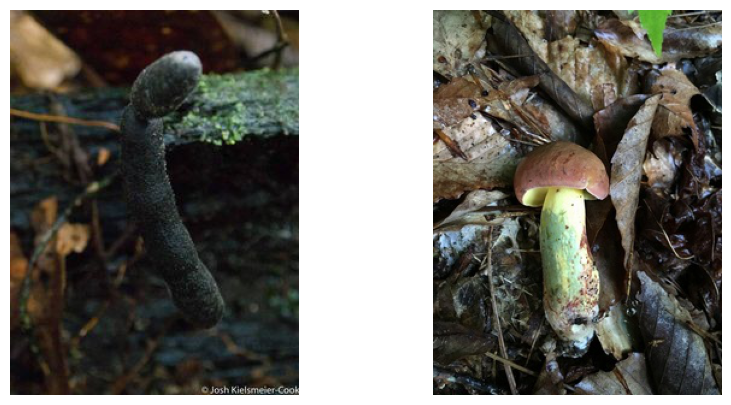

In [81]:
# Sélectionner les URL des images de manière aléatoire
random_images = df.sample(n=2)['image_url']

# Créer une figure avec deux sous-figures
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Afficher les images
for i, url in enumerate(random_images):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    ax[i].imshow(img)
    ax[i].axis('off')
    
# Afficher la figure
plt.show()

Cela nous permet de voir que nos modifications sur les URLs ont bien marchées et de voir le type d'image que nous avons

# Identification de la problématique

Nous avons collecté un nombre très important d'images pour notre projet, cela peut en réalité poser un défi en termes de gestion et d'analyse de toutes ces données.

Il est donc essentiel que nous nous concentrions sur un échantillon plus faible et pertinent pour notre problématique. Pour cela, nous devons identifier une question de recherche précise et pertinente pour notre domaine d'étude, afin de déterminer quels échantillons d'images seront les plus utiles pour notre analyse.

Nous avons décidé de travailler sur la **reconnaissance automatique du TOP 10 des champignons français ayant été accepté sur le site et ayant une confiance de classification supérieur à 95%.**

Pour cela nous effectuons plusieurs étapes :

### Selection des champignons avec le status ACCEPTED et confiance >0.95

In [82]:
# Uniquement les champignons avec la status accepté sur le site
df = df.loc[df['status']=='ACCEPTED']
# Uniquement les champignons avec une confiance accordée sur la classification supérieur à 95%
df = df.loc[df['confidence'] > 0.95]

### Champignon Francais

In [83]:
# Nous avons obtenus une liste des champignons français
listfrance = ["Agaricus arvensis","Agaricus augustus","Agaricus campestris","Agaricus silvicola","Agaricus xanthoderma","Agrocybe cylindracea","Albatrellus ovinus","Aleuria aurantia","Amanita caesarea","Amanita citrina","Amanita fulva","Amanita junquillea","Amanita gemmata","Amanita muscaria","Amanita ovoidea","Amanita pantherina","Amanita phalloides","Amanita rubescens","Amanita spissa","Amanita vaginata","Amanita verna","Amanita virosa","Ampulloclitocybe clavipes","Anthurus archeri","Armillaria mellea","Auricularia auricula-judae","Boletus aereus","Boletus aestivalis","Boletus appendiculatus","Boletus calopus","Boletus edulis","Boletus erythropus","Boletus luridus","Boletus pinophilus","Boletus queletii","Boletus satanas","Boletus rhodopurpureus","Boletus aereus","Boletus edulis","Boletus pinophilus","Boletus aestivalis","Boletus aereus","Calocera viscosa","Calocybe gambosa","Calvatia excipuliformis","Calvatia gigantea","Cantharellus cibarius","Chalciporus piperatus","Chlorophyllum rhacodes","Chroogomphus rutilus","Clathrus ruber","Clavariadelphus pistillaris","Clavariadelphus truncatus","Clavulina cristata","Clavulina rugosa","Clitocybe amoenolens","Clitocybe connata","Clitocybe nebularis","Clitocybe odora","Clitopilus prunulus","Coprinellus micaceus","Coprinopsis atramentaria","Coprinopsis picacea","Coprinus comatus","Coprinus disseminatus","Cortinarius alboviolaceus","Cortinarius camphoratus","Cortinarius caperatus","Cortinarius cinnamomeus","Cortinarius orellanus","Cortinarius praestans","Cortinarius speciosissimus","Cortinarius splendens","Cortinarius triumphans","Cortinarius varius","Cortinarius violaceus","Craterellus cinereus","Craterellus cornucopioides","Craterellus lutescens","Craterellus tubaeformis","Daedaleopsis tricolor","Dacrymyces stillatus","Disciotis venosa","Dendropolyporus umbellatus","Entoloma clypeatum","Entoloma sinuatum","Entoloma nitidum","Fuligo septica","Flammulina velutipes","Fistulina hepatica","Galerina marginata","Geastrum fimbriatum","Geastrum triplex","Gomphidius glutinosus","Gomphidius roseus","Gomphus clavatus","Grifola frondosa","Gymnopilus penetrans","Gymnopilus spectabilis","Gymnopus dryophilus","Gymnopus peronatus","Gyromitra esculenta","Gyroporus castaneus","Gyroporus cyanescens","Hebeloma crustuliniforme","Hebeloma laterinum","Hebeloma radicosum","Helvella crispa","Helvella lacunosa","Helvella macropus","Hydnum repandum","Hydnum rufescens","Hygrocybe conica","Hygrocybe pratensis","Hygrocybe virginea","Hygrophoropsis aurantiaca","Hygrophorus agathosmus","Hygrophorus eburneus","Hygrophorus latitabundus","Hygrophorus nemoreus","Hygrophorus russula","Hypholoma fasciculare","Hypholoma lateritium","Infundibulicybe geotropa","Infundibulicybe gibba","Inocybe fastigiata","Inocybe rimosa","Inocybe geophylla","Inocybe patouillardii","Inocybe erubescens","Kuehneromyces mutabilis","Laccaria amethystina","Laccaria laccata","Lactarius blennius","Lactarius camphoratus","Lactarius chrysorrheus","Lactarius deliciosus","Lactarius deterrimus","Lactarius lignyotus","Lactarius necator","Lactarius piperatus","Lactarius rufus","Lactarius sanguifluus","Lactarius torminosus","Lactarius vellereus","Lactarius volemus","Laetiporus sulphureus","Leccinum aurantiacum","Leccinum crocipodium","Leccinum lepidum","Leccinum scabrum","Leccinum versipelle","Lepiota brunneoincarnata","Lepiota clypeolaria","Lepiota cristata","Lepista flaccida","Lepista nuda","Lepista saeva","Lepista sordida","Leucoagaricus leucothites","Lycoperdon echinatum","Lycoperdon perlatum","Lyophyllum decastes","Macrolepiota mastoidea","Macrolepiota procera","Marasmius oreades","Megacollybia platyphylla","Morchella elata","Morchella esculenta","Morganella pyriformis","Mutinus caninus","Mycena polygramma","Mycena pura","Mycena rosea","Otidea onotica","Omphalotus olearius","Oudemansiella mucida","Paxillus involutus","Phaeolepiota aurea","Phallus impudicus","Pholiota squarrosa","Pleurotus cornucopiae","Pleurotus eryngii","Pleurotus ostreatus","Pluteus cervinus","Pluteus leoninus","Polyporus squamosus","Psathyrella candolleana","Psathyrella piluliformis","Pseudoclitocybe cyathiformis","Pseudohydnum gelatinosum","Psilocybe semilanceata","Ramaria aurea","Ramaria botrytis","Ramaria formosa","Ramaria stricta","Rhodocollybia butyracea","Russula amara","Russula badia","Russula cutefracta","Russula cyanoxantha","Russula emetica","Russula olivacea","Russula queletii","Russula risigallina","Russula chamaeleontina","Russula sanguinaria","Russula sardonia","Russula drimeia","Russula vesca","Russula virescens","Russula xerampelina","Sarcoscypha coccinea","Schizophyllum commune","Scleroderma citrinum","Scleroderma verrucosum","Sparassis crispa","Strobilomyces strobilaceus","Stropharia aeruginosa","Suillus bovinus","Suillus cavipes","Suillus granulatus","Suillus grevillei","Suillus luteus","Tapinella atrotomentosa","Tremiscus helvelloides","Tricholoma album","Tricholoma equestre","Tricholoma pardinum","Tricholoma portentosum","Tricholoma scalpturatum","Tricholoma sciodes","Tricholoma sulphureum","Tricholoma terreum","Tricholoma virgatum","Tricholomopsis rutilans","Tuber melanosporum","Tylopilus felleus","Volvariella gloiocephala","Xerocomus badius","Xerocomus chrysenteron","Xerula radicata"]

In [84]:
# Nous décidons de garde que des champignons français
dfchampi = df.loc[df['label'].isin(listfrance)]

### Selection TOP 10

In [85]:
# Compter en fonction des labels
counts=dfchampi["label"].value_counts()
# Garder uniquement le TOP 10 plus fréquent
selected = dfchampi[dfchampi["label"].isin(counts.nlargest(10).index)] 
# Afficher les champignons sélectionnés
print("Notre dataset final d'analyse comporte", selected.shape[0], "lignes et ", selected.shape[1], "colonnes.")

Notre dataset final d'analyse comporte 9448 lignes et  31 colonnes.


# Téléchargement des images

Nous téléchargeons donc ces images en local (code mis en commentaire pour éviter de relancer par erreur).
Temps d'executions supérieur à 2H. Images en totalité disponibles sur notre github de travail.

In [86]:
'''
# créer un dossier pour stocker les images
if not os.path.exists("images"):
    os.makedirs("images")

# itérer sur chaque ligne du dataset
total_images = len(selected)
percent_step = 5
current_percent = percent_step
for index, row in selected.iterrows():
    # récupérer l'URL de l'image
    image_url = row["image_url"]
    # extraire l'ID de l'image du nom du fichier
    image_id = row["image_id"]
    # récupérer le contenu de l'image
    response = requests.get(image_url)
    # écrire le contenu de l'image dans un fichier local
    with open(f"images/{image_id}.jpg", "wb") as f:
        f.write(response.content)
    # afficher la progression en pourcentage
    current_percent = (index + 1) * 100 // total_images
    if current_percent >= percent_step:
        print(f"{current_percent}% des images téléchargées")
        percent_step += 5
'''

'\n# créer un dossier pour stocker les images\nif not os.path.exists("images"):\n    os.makedirs("images")\n\n# itérer sur chaque ligne du dataset\ntotal_images = len(selected)\npercent_step = 5\ncurrent_percent = percent_step\nfor index, row in selected.iterrows():\n    # récupérer l\'URL de l\'image\n    image_url = row["image_url"]\n    # extraire l\'ID de l\'image du nom du fichier\n    image_id = row["image_id"]\n    # récupérer le contenu de l\'image\n    response = requests.get(image_url)\n    # écrire le contenu de l\'image dans un fichier local\n    with open(f"images/{image_id}.jpg", "wb") as f:\n        f.write(response.content)\n    # afficher la progression en pourcentage\n    current_percent = (index + 1) * 100 // total_images\n    if current_percent >= percent_step:\n        print(f"{current_percent}% des images téléchargées")\n        percent_step += 5\n'

In [87]:
def load_jpeg_images(path):
    """
    Charge toutes les images JPEG du répertoire spécifié par `path`.
    
    Args:
        path (str): Le chemin absolu du répertoire contenant les images JPEG.
    
    Returns:
        pandas.DataFrame: Un DataFrame contenant les identifiants et les tableaux de pixels
        de chaque image JPEG dans le répertoire.
    
    Raises:
        ValueError: Si `path` est un répertoire vide.
        OSError: Si `path` n'est pas un répertoire valide.
    """
    # Vérifie si le chemin spécifié est un répertoire valide
    if not os.path.isdir(path):
        raise OSError(f"'{path}' n'est pas un répertoire valide.")
    
    # Récupère la liste des fichiers JPEG dans le répertoire
    image_files = [f for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.jpeg')]
    
    # Vérifie si le répertoire contient des images JPEG
    if not image_files:
        raise ValueError(f"'{path}' ne contient pas d'images JPEG.")
    
    # Initialise les listes pour stocker les identifiants et les tableaux de pixels des images
    ids = []
    images = []
    
    # Boucle sur tous les fichiers JPEG dans le répertoire
    for file in image_files:
        # Récupère l'identifiant de l'image à partir du nom de fichier (sans l'extension)
        ids.append(os.path.splitext(file)[0])
        
        # Ouvre l'image avec le module PIL et convertit le tableau de pixels en un tableau NumPy
        with Image.open(os.path.join(path, file)) as image:
            image_data = np.array(image)
            
            # Ajoute le tableau de pixels à la liste d'images
            images.append(image_data)
    
    # Crée un DataFrame avec les identifiants et les tableaux de pixels des images
    return pd.DataFrame({"ids": np.array(ids), "img": np.array(images)})

In [88]:
help(load_jpeg_images)
df_images=load_jpeg_images("images/")

Help on function load_jpeg_images in module __main__:

load_jpeg_images(path)
    Charge toutes les images JPEG du répertoire spécifié par `path`.
    
    Args:
        path (str): Le chemin absolu du répertoire contenant les images JPEG.
    
    Returns:
        pandas.DataFrame: Un DataFrame contenant les identifiants et les tableaux de pixels
        de chaque image JPEG dans le répertoire.
    
    Raises:
        ValueError: Si `path` est un répertoire vide.
        OSError: Si `path` n'est pas un répertoire valide.



# Sorties de ce notebook

In [89]:
# Création d'un dossier dataframe pour stocker nos sorties.
if not os.path.exists("dataframe"):
    os.makedirs("dataframe")

Dans ce premier notebook, nous avons deux sorties qui nous sont utiles pour la suite. 
La première est le dataframe selected qui contient les observations des images selectionnées vis à vis de notre problématique choisie : 

In [90]:
selected.to_csv("dataframe/champignons.csv")

La deuxième sortie, est la dataframe : df_images obtenu avec la fonction load_jpeg_images("images/"). Cette fonction devra 
être relancée dans les autres notebook car nous avons pas réussi à exporter en csv et pickle à cause de la taille.

In [91]:
df_images.head(5)

,ids,img
0,100198,"[[[0, 2, 0], [0, 2, 0], [1, 3, 0], [2, 4, 0], ..."
1,100199,"[[[3, 3, 1], [2, 2, 0], [1, 1, 0], [0, 0, 0], ..."
2,100200,"[[[15, 16, 11], [13, 14, 9], [10, 11, 6], [8, ..."
3,100201,"[[[4, 10, 8], [0, 4, 2], [0, 4, 2], [4, 10, 8]..."
4,100413,"[[[37, 43, 39], [57, 63, 59], [50, 57, 50], [1..."
